In [30]:
import numpy as np
from astropy import units as u, constants as c
import json
from glob import glob
from astropy.table import Table,Column
import random as r
import scipy.optimize as opt
from astropy.coordinates import SkyCoord
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [33]:
pbs,comptmp,omtmp,ecctmp,p0s,names=np.loadtxt('binary_psrcatquery.txt',usecols=[1,2,3,4,5,6],dtype=str,unpack=True)


In [111]:
pbs=np.array(pbs.astype(float))
ctypes=[]
comps=[]
for cmp in comptmp:
    cmp_strip=cmp.split('[')[0].split('(')[0]
    if cmp_strip=='*':
        cmp_strip='Unknown'
    if cmp_strip not in ctypes:
        ctypes.append(cmp_strip)
    if cmp_strip!='*':
        comps.append(cmp_strip)
    else:
        comps.append('Unknown')
omdots,eccs=[],[]
for om,ecc in zip(omtmp,ecctmp):
    if om!='*':
        omdots.append(float(om))
    else:
        omdots.append('*')
    if ecc!='*':
        eccs.append(float(ecc))
    else:
        eccs.append('*')
ecc=[]
for v in eccs:
    if v=='*':
        ecc.append(0)
    else:
        ecc.append(v)
#omdots=np.array(omdots)
#eccs=np.array(eccs)
ctypes=np.array(ctypes)
comps=np.array(comps)
p0s=np.array(p0s.astype(float))

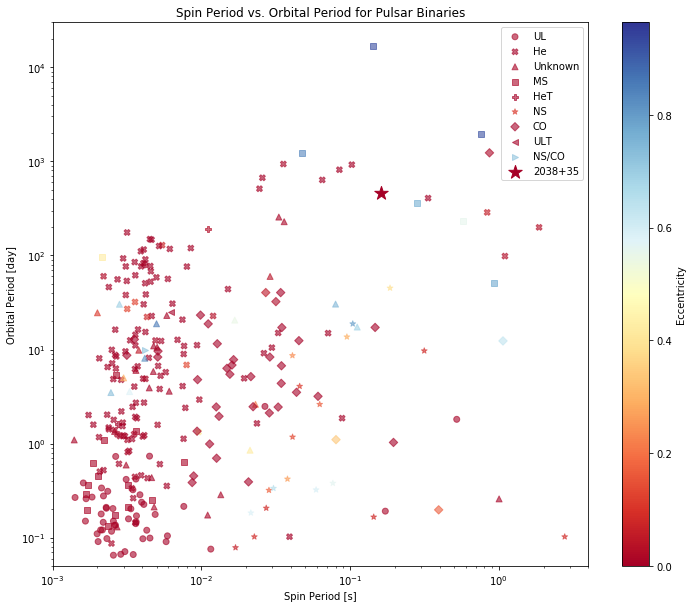

In [113]:
cm=plt.cm.get_cmap('RdYlBu')
markers=['o','X','^','s','P','*','D','<','>']
clrs=[]
for e in eccs:
    if e!='*':
        clrs.append(cm(float(e)))
    else:
        clrs.append(cm(2))
sc=plt.scatter(p0s,pbs,c=ecc,cmap=cm)
cb=plt.colorbar(sc)
plt.close()        
plt.figure(figsize=(12,10))
plt.xlabel('Spin Period [s]')
plt.ylabel('Orbital Period [day]')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(sc,label='Eccentricity')
plt.title('Spin Period vs. Orbital Period for Pulsar Binaries')
for m,ct in zip(markers,ctypes):
    cnd = np.array(comps==ct)
    plt.scatter(np.array(p0s)[cnd],np.array(pbs)[cnd],c=np.array(clrs)[cnd],cmap=cm,marker=m,label=ct,alpha=0.6)
pb_2038=462.51578189875295 
p0_2038=1/6.243567392
plt.scatter(p0_2038,pb_2038,c=mpl.colors.to_hex(cm(0)),marker='*',s=200,label='2038+35')
plt.legend()
plt.xlim([1e-3,4])
plt.ylim([5e-2,3e4])
plt.show()
#plt.savefig('p0vspb.pdf')

In [149]:
def omdot(pb,e,mc,mp=1.4):
    t0=c.G*c.M_sun/c.c**3
    if str(type(e)) in [list,np.ndarray]:
        omd_arr=[]
        for ecc in e:
            omd_arr.append(omdot(pb,e,mc,mp))
        return np.array(omd_arr)
    return (u.rad*3*t0**(2./3)*(pb/(2*np.pi))**(-5./3)*(mp+mc)**(2./3)/(1-e**2)).decompose().to('rad/s')


In [235]:
od_2317=omdot(pb=2.4593*u.day,e=5.202e-07,mc=0.1721)
e_2317=5.202e-07
pb2_e_2317=(2.4593**2)/e_2317

od_1012=omdot(pb=0.6047*u.day,e=1.301e-6,mc=0.1071)
e_1012=1.301e-6
pb2_e_1012=(0.6047**2)/e_1012

e=np.logspace(-5,0,30)
#e=np.linspace(1e-5,1,10)
od_2038=omdot(pb=462.51578189875295*u.day,e=e,mc=0.4)
pb2_e_2038=(462.51578189875295**2)/e

/Users/aemcewen/opt/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0.5, 1.0, 'Equivalence Principle Criteria for J2038+35')

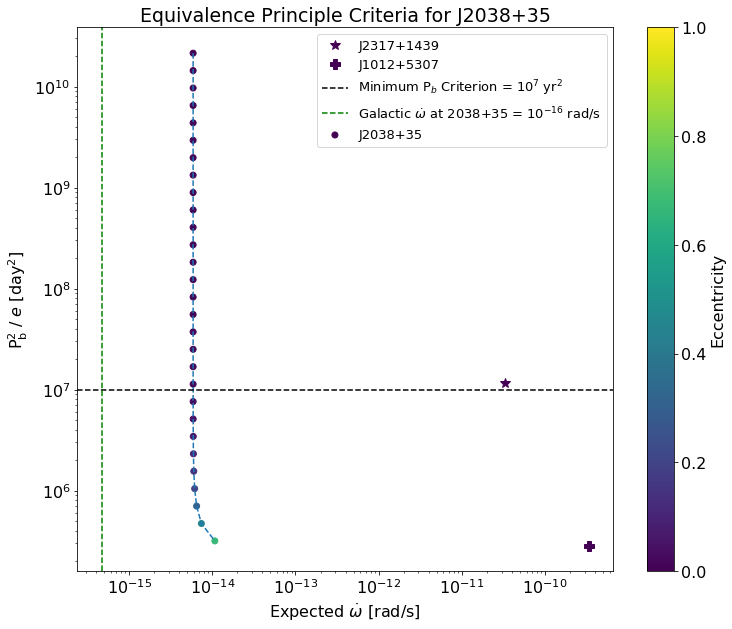

In [236]:
cm=plt.cm.get_cmap('viridis')
plt.figure(figsize=(12,10))
fs=16
plt.xscale('log')
plt.yscale('log')
plt.plot(od_2317,pb2_e_2317,marker='*',label='J2317+1439',linewidth=0,markersize=10,color=mpl.colors.to_hex(cm(e_2317)))
plt.plot(od_1012,pb2_e_1012,marker='P',label='J1012+5307',linewidth=0,markersize=10,color=mpl.colors.to_hex(cm(e_1012)))

sc=plt.scatter(od_2038,pb2_e_2038,c= [mpl.colors.to_hex(cm(v)) for v in e],label='J2038+35')
plt.plot(od_2038,pb2_e_2038,markersize=0,ls='--')

cbar=plt.colorbar(sc)
cbar.ax.tick_params(labelsize=fs)
plt.tick_params(labelsize=fs)
cbar.set_label(label='Eccentricity',fontsize=fs)
plt.xlabel(r'Expected $\dot{\omega}$ [rad/s]',fontsize=fs)
plt.ylabel(r'$\rm P_{\rm b}^2$ / $e$ [day$^2$]',fontsize=fs)
plt.axhline(y=1e7,ls='--',color='k',label=r'Minimum P$_b$ Criterion = 10$^7$ yr$^2$')
plt.axvline(x=4.7e-16,ls='--',color='green',label='Galactic $\dot{\omega}$ at 2038+35 = 10$^{-16}$ rad/s')
plt.legend(fontsize=fs-3)
plt.title('Equivalence Principle Criteria for J2038+35',fontsize=fs+3)

Text(0.5, 1.0, '$\\dot{\\rm P}$ Limit for Age Criterion')

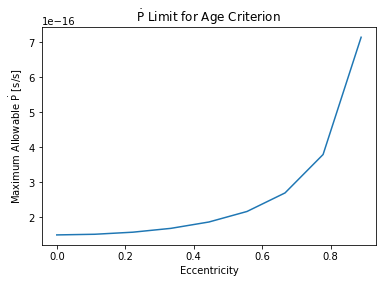

In [218]:
p0=1*u.s/6.243567392
plt.plot(e,p0*od_2038/(2*np.pi))
plt.xlabel('Eccentricity')
plt.ylabel(r'Maximum Allowable $\dot{\rm P}$ [s/s]')
plt.title(r'$\dot{\rm P}$ Limit for Age Criterion')

In [216]:
p0

<Quantity 0.16016484 s>

In [230]:
e

array([1.00000000e-05, 3.59381366e-05, 1.29154967e-04, 4.64158883e-04,
       1.66810054e-03, 5.99484250e-03, 2.15443469e-02, 7.74263683e-02,
       2.78255940e-01, 1.00000000e+00])